# Computación Científica - Tarea 4
---
Vicente Lizana Estivill  
vlizana@alumnos.inf.utfsm.cl  
201310004-K

---

## Introducción
---



En esta tarea implementaremos el método de Newton N-dimensional para encontrar soluciones de sistemas de ecuaciones no lineales. Para esto, en cada iteración debemos resolver un sistema lineal de ecuaciones, utilizando en este caso la descomposición PALU en primera instancia y luego el método iterativo de Gauss-Seidel.

---

## Desarrollo y Análisis de Resultados
---

### Bibliotecas y Configuración
---

In [1]:
%matplotlib inline
import numpy as np
from scipy.linalg import solve, lu
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.mlab as mlab
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact
from ipywidgets import widgets
import matplotlib
import matplotlib.cm as cm

In [2]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

In [3]:
def visual(n_steps_newton=10,x00=-2,x01=-2):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        xs[:,n+1]=xs[:,n]-np.linalg.solve(JM(xs[0,n],xs[1,n]),b).T

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

---

### PALU
---

Dentro de la función visual, reemplazar la `función np.linalg.solve` (destacado en comentarios) con el método **PALU** para resolver el sistema de ecuaciones, para los puntos iniciales indicados más abajo, ¿Que observaciones puede destacar del comportamiento del método  y las soluciones encontradas? ¿Existen mejoras si aumenta el número de iteraciones? ¿Cuantas iteraciones se necesitan para saturar la solución?

1. **(5 puntos)** $\mathbf{x}_0=\langle1,2\rangle$
2. **(10 puntos)** $\mathbf{x}_0=\langle0,2\rangle$
3. **(15 puntos)** $\mathbf{x}_0=\langle-2,-2\rangle$

---

In [4]:
def visual_palu(n_steps_newton=2,x00=0.5,x01=2):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        J = JM(xs[0,n],xs[1,n])
        pl, u = lu(J, permute_l=True)
        xs[:,n+1]=xs[:,n]-np.linalg.solve(u, np.linalg.solve(pl, b)).T
        
    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

---
$\mathbf{x}_0=\langle1,2\rangle$ con 2, 4 y 10 iteraciones de Newton:

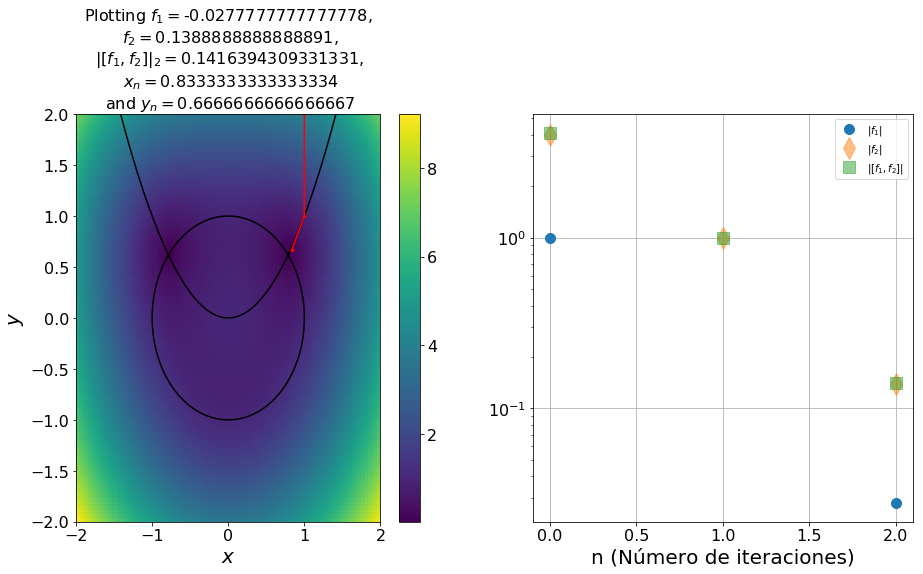

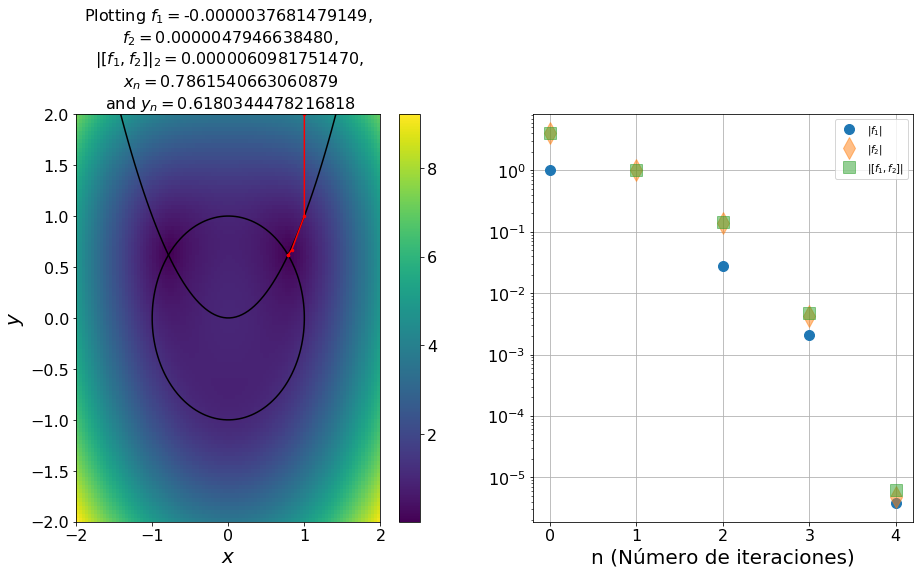

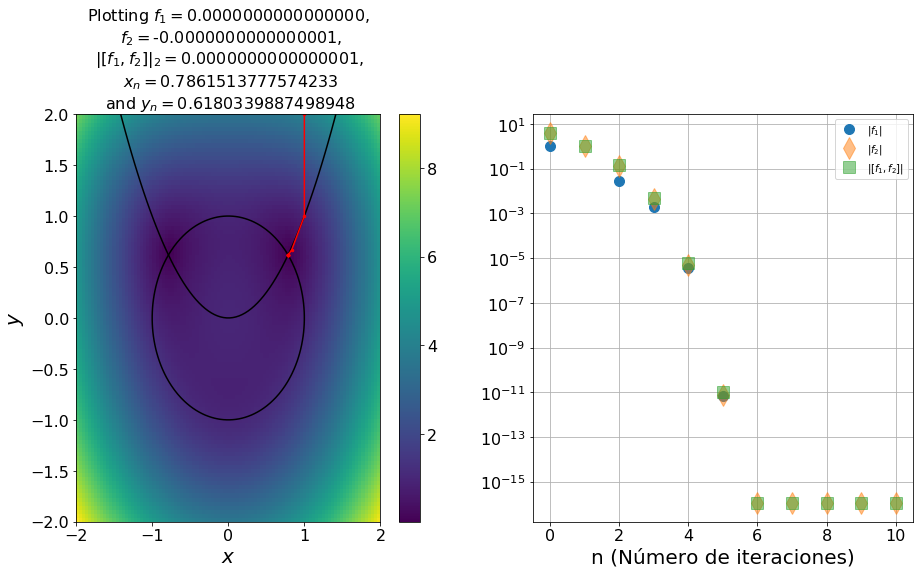

In [5]:
visual_palu(2, 1, 2)
visual_palu(4, 1, 2)
visual_palu(10, 1, 2)

Esta _initial guess_ converge y mejora con cada iteración hasta la sexta, que es donde se satura la solución. Desde la sexta iteración, como se puede ver en el gráfico, ya no se acerca más a la solución.

---
$\mathbf{x}_0=\langle0,2\rangle$ con 2 iteraciones de Newton:

In [6]:
try:
    visual_palu(2, 0, 2)
except np.linalg.LinAlgError as error:
    print("Algebraic Error:", error.args[0])

Algebraic Error: Singular matrix


Este _initial guess_ no nos sirve ya que las derivadas de las dos funciones con respecto a $x$ se hacen $0$ cuando $x = 0$, por lo tanto cualquier initial guess en esa recta nos entrega un jacobiano singular.

---
$\mathbf{x}_0=\langle-2,-2\rangle$ con 4, 10 y 25 iteraciones de Newton:

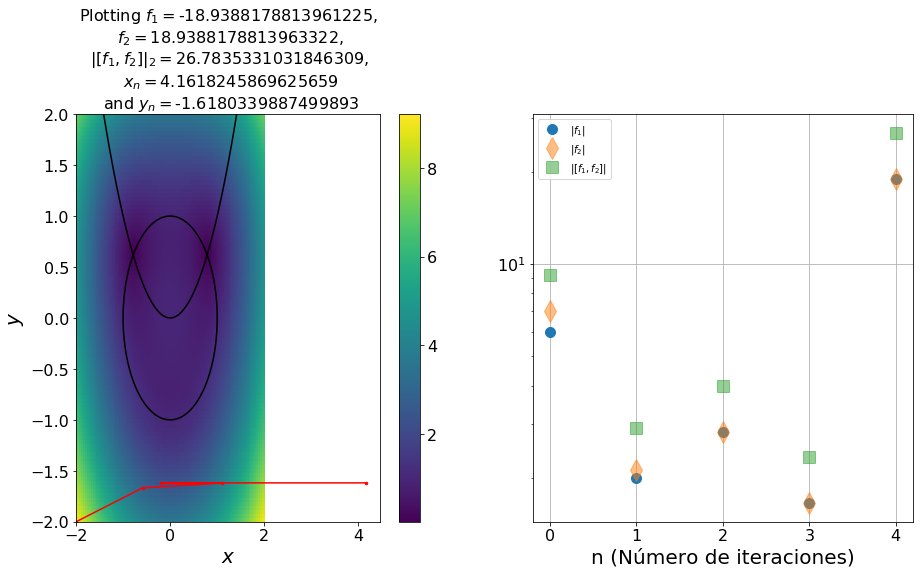

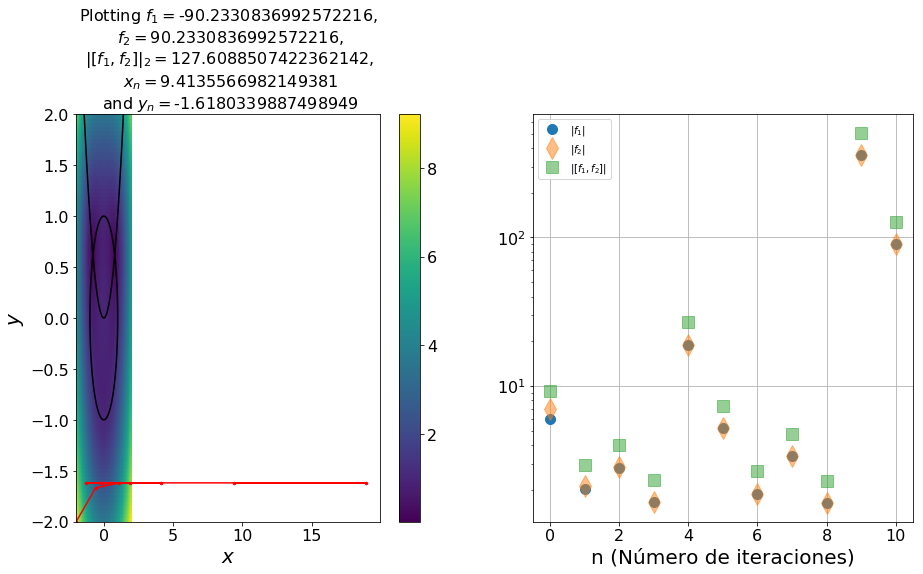

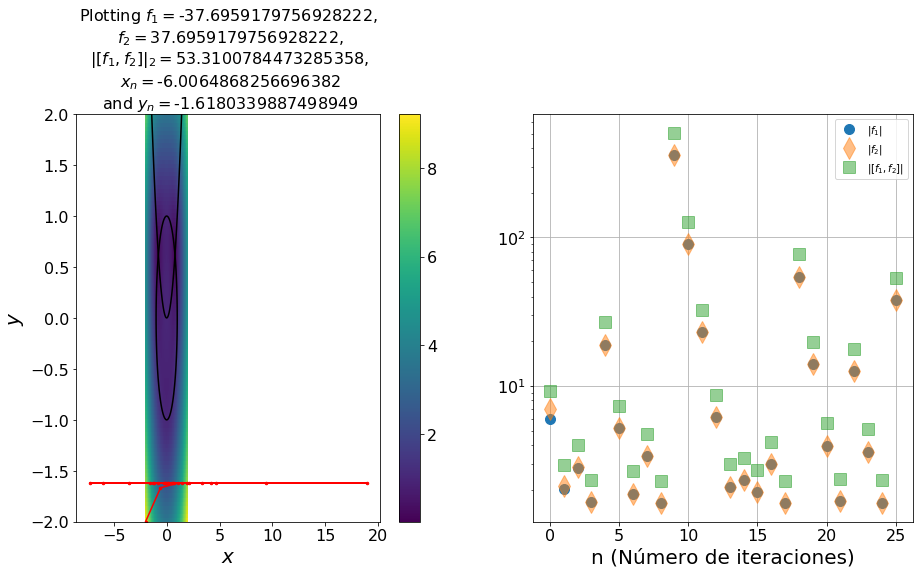

In [7]:
visual_palu(4, -2, -2)
visual_palu(10, -2, -2)
visual_palu(25, -2, -2)

Esta _initial guess_ diverge, podemos ver que sin importar el número de iteraciones el error tiene una cota inferior determinada (bastante alta) y el comportamiento de las iteraciones no es para nada predecible.

---
El método de Newton con PALU se comporta prácticamente igual que el original, ya que aplicamos descomposición PALU sobre el jacobiano, el cual varía en cada iteración. Esto implica que no podemos precalcular la matriz triangular inferior y reutilizarla a medida que vamos iterando, perdiendo la ventaja de PALU. La complejidad es la misma.

---

### Métodos Iterativos
---

(1) Acople el método iterativo de **Gauss-Seidel** al visualizador, (2) incluya un cuarto parametro al widget para controlar el número de iteraciones de **Gauss-Seidel**, (3) use el algoritmo implementado para los siguientes puntos iniciales indicados más abajo. En ambos casos ¿Como afecta el número de iteraciones en la convergencia de la solución?

1. **(30 puntos)** Construir visual2: (1) Acoplando Gauss-Seidel y (2) Incluyendo un cuarto parámetro al widget
2. **(10 puntos)** $\mathbf{x}_0=\langle1,2\rangle$
3. **(10 puntos)** $\mathbf{x}_0=\langle-2,-2\rangle$

**(20 Puntos)** Respecto al análisis realizado en el punto anterior, ¿Que información se desprende del segundo gráfico? ¿Que medida corresponde la curva $\|[f_1 , f_2]\|_2$ ?

---

In [8]:
def visual_gs(n_steps_newton=10,x00=1,x01=2, n_steps_GS=100):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        J = JM(xs[0,n],xs[1,n])
        L_D = np.tril(J)
        U = np.triu(J) - np.diag(np.diag(J))
        
        # Creating matrix to store all approximations made by the GS's method
        xgs=np.zeros((2,n_steps_GS+1))
        xgs[:,0]=xs[:,n]
        
        # Applying GS's method n_steps_GS
        for k in np.arange(n_steps_GS):
            xgs[:,k+1] = np.linalg.solve(L_D, b - (U @ xgs[:,k].reshape((2,1)))).T
    
        xs[:,n+1]=xs[:,n]-xgs[:,-1]

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

In [9]:
interact(visual_gs,n_steps_newton=(1,10),x00=(-2,2,0.1),x01=(-2,2,0.1), n_steps_GS=(1,100))

<function __main__.visual_gs>

---
$\mathbf{x}_0=\langle1,2\rangle$ con 10 iteraciones de Newton; 7, 8 y 30 iteraciones de Gauss-Seidel:

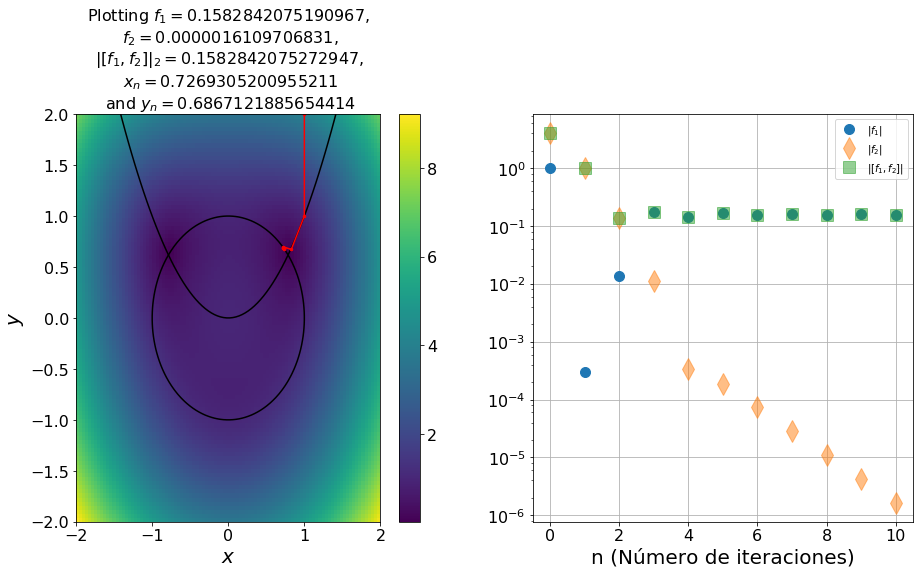

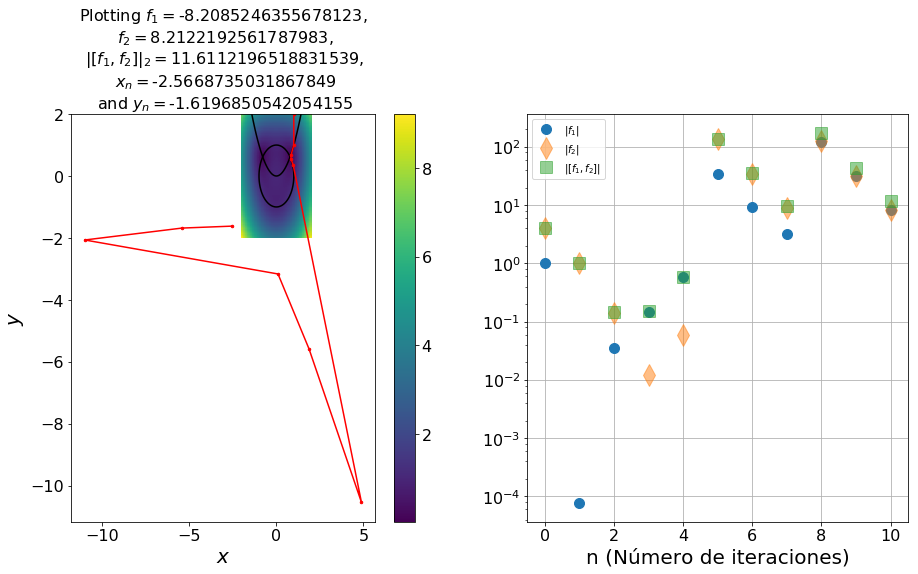

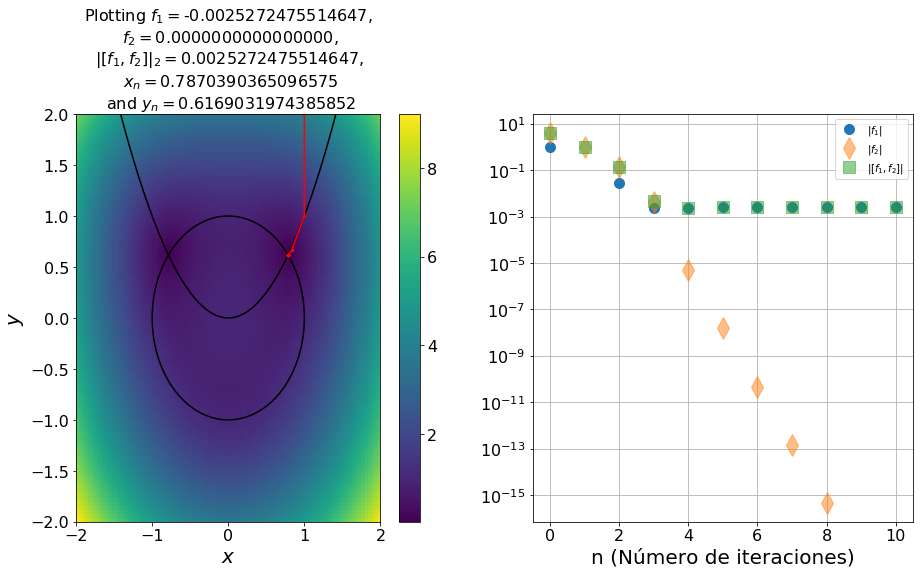

In [10]:
visual_gs(10, 1, 2, 7)
visual_gs(10, 1, 2, 8)
visual_gs(10, 1, 2, 30)

Se puede ver que se converge a una buena aproximación con 7 iteraciones GS pero con 8 diverge. Esto se debe al comportamiento oscilatorio que tienen las primeras iteraciones GS, en donde converge con una cantidad impar de iteraciones en general. Este efecto va desapareciendo y podemos ver que ya en 30 iteraciones GS llegamos a una solución estable.

---
$\mathbf{x}_0=\langle-2,-2\rangle$ con 10 iteraciones de Newton; 7, 8 y 30 iteraciones de Gauss-Seidel:

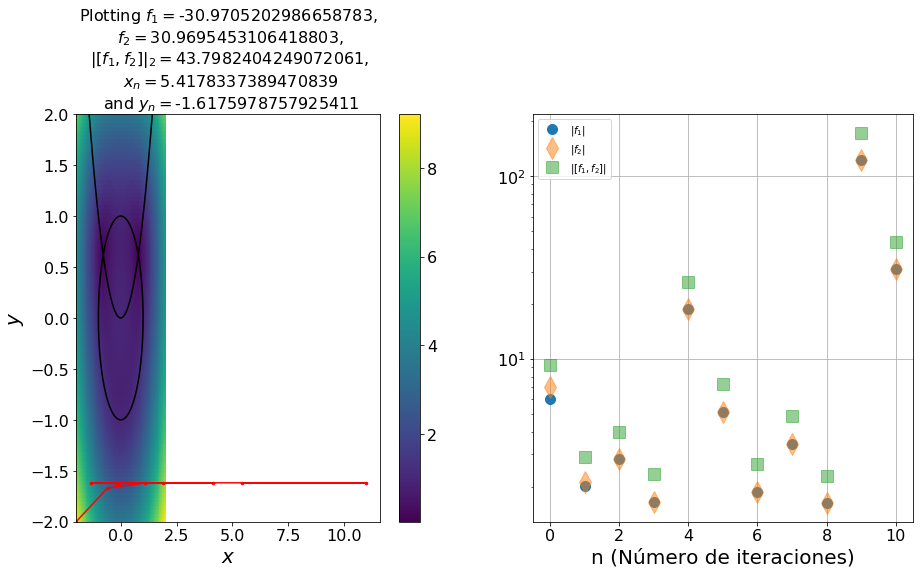

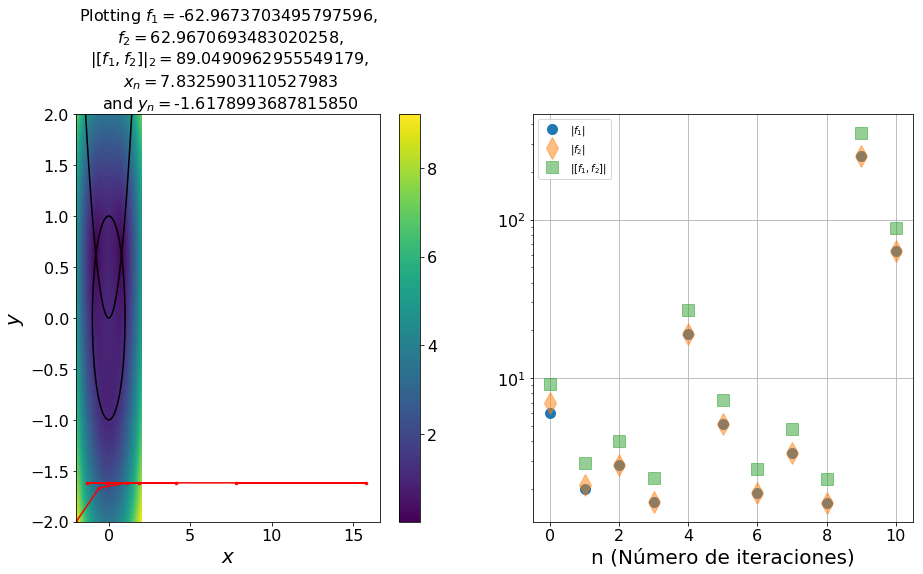

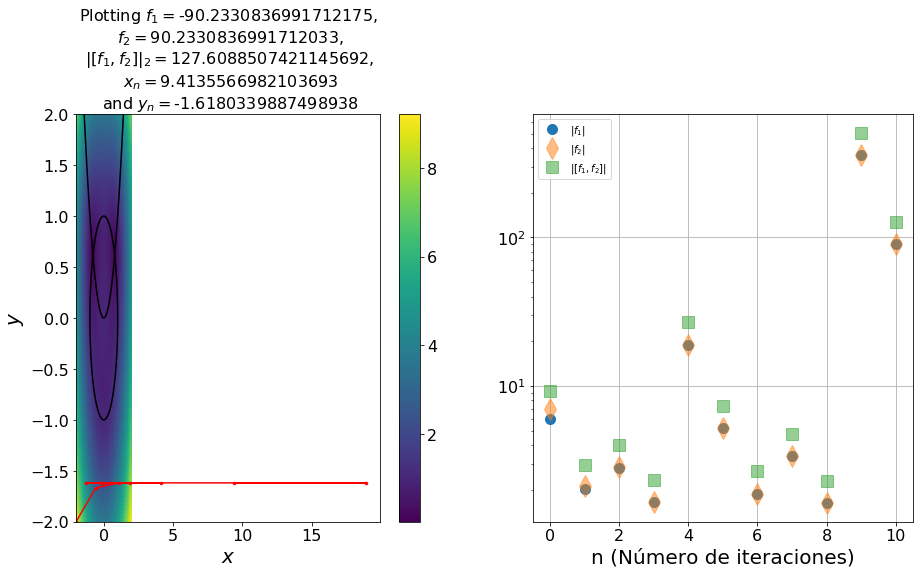

In [11]:
visual_gs(10, -2, -2, 7)
visual_gs(10, -2, -2, 8)
visual_gs(10, -2, -2, 30)

Podemos ver que la divergencia tiene el mismo comportamiento para cualquier número de iteraciones.

---

Respecto a la curva $\|[f_1 , f_2]\|_2$, que nos muestra el error, podemos ver que en Gauss-Seidel se estabiliza en menos iteraciones de Newton (cuando converge), sin embargo se estabiliza a un error más alto que el de PALU.

También se aprecia que mientras mayor sea la cantidad de iteraciones GS, se estabiliza en más iteraciones a un error menor, por lo que existe un _tradeoff_ entre presición y tiempo de computación en lo que se refiere a métodos iterativos.

---

## Conclusiones
---

En este trabajo apreciamos las diferencias entre utilizar un método completo y uno incompleto. A modo de conclusión general, los métodos incompletos son ajustables, es decir, podemos calcular cuanto tiempo de computación necesitaremos para la presición deseada y si no concuerdan los valores podemos sacrificar uno de los dos recursos. 

Se debe analizar siempre que el tiempo de computación no se acerque al de los métodos completos ya que en este caso es probablemente más conveniente usar el completo.

## Referencias
---

[Documentación de Numpy](http://www.numpy.org/)  
[Documentación de SciPy](https://www.scipy.org/)  
[Documentación de Matplotlib](http://matplotlib.org/)  
[Documentación de IpyWidgets](https://github.com/ipython/ipywidgets)